In [1]:
import numpy as np
import lmfit
from lmfit import Model
import matplotlib.pyplot as plt
import pykat
from pykat.optics.ABCD import *

pykat.init_pykat_plotting(fmts=['png'])

                                              ..-
    PyKat 1.1.244         _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,  
   `^-....____:   +.      www.gwoptics.org/pykat



# Knife edge measurements of SRM heater CO2 laser

In [2]:
def fit(x, y, Pvary=False, **kwargs):
    model = lmfit.models.ExpressionModel("P/2 *(1 - erf(sqrt(2) * (x - x0)/w))")
    params = model.make_params(**kwargs)
    if not Pvary: params['P'].set(vary=False)

    fit = model.fit(y, params, x=x)
    print(fit.fit_report())

    fit.plot_fit()
    plt.xlabel("Edge offset [m]")
    plt.ylabel("Power [W]")
    
    return float(fit.params['w'])

## Initial measurement done around ~2.4m from the periscope

[[Model]]
    Model(_eval)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 48
    # data points      = 27
    # variables        = 3
    chi-square         = 8.8812e-07
    reduced chi-square = 3.7005e-08
    Akaike info crit   = -459.209922
    Bayesian info crit = -455.322412
[[Variables]]
    P:   0.05562607 +/- 3.9056e-04 (0.70%) (init = 48)
    x0:  0.00221146 +/- 2.1930e-05 (0.99%) (init = 0.0025)
    w:   0.00407701 +/- 3.6073e-05 (0.88%) (init = 0.01)
[[Correlations]] (unreported correlations are < 0.100)
    C(P, x0) = -0.980
    C(P, w)  =  0.916
    C(x0, w) = -0.905



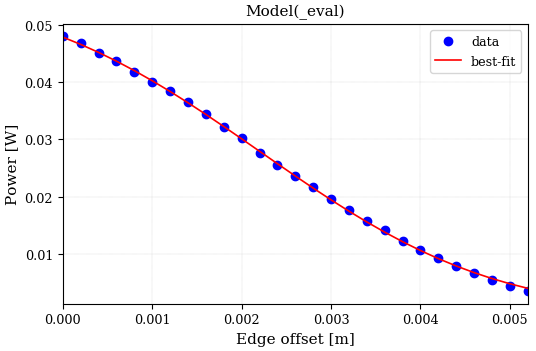

In [4]:
y = [48, 46.8, 45.2, 43.7, 41.8, 40.1, 38.4, 36.5, 34.4, 32.2, 30.2, 27.6, 25.6, 23.6, 21.6, 19.5, 17.6, 15.8, 14.1, 12.3, 10.6, 9.2, 7.9, 6.7, 5.5, 4.4, 3.5]
y = np.array(y) * 1e-3
x = 20*np.arange(len(y)) *0.01e-3

# our initial measurement used a smaller Thorlab power meter which was clipping the beam slightly
# so I let the total power vary here
w10 = fit(x, y, P=48, x0=2.5e-3, w=10e-3, Pvary=True)
d10 = d10 = 1.2827+1.651+2.4

## Further measurements done on table

[[Model]]
    Model(_eval)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 24
    # data points      = 12
    # variables        = 2
    chi-square         = 1.3639e-06
    reduced chi-square = 1.3639e-07
    Akaike info crit   = -187.881112
    Bayesian info crit = -186.911299
[[Variables]]
    P:   0.05097 (fixed)
    x0:  0.00239617 +/- 8.5622e-06 (0.36%) (init = 0.0025)
    w:   0.00157572 +/- 2.4218e-05 (1.54%) (init = 0.005)



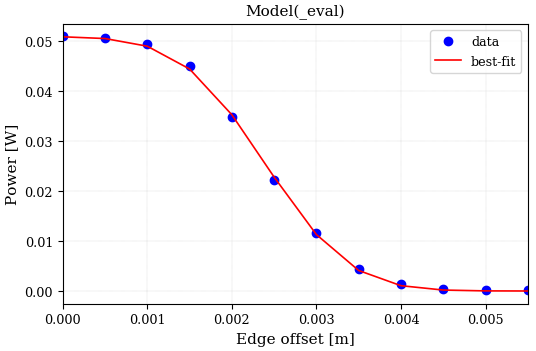

In [5]:
d1= (19.5-8) * 1e-2 # distance from first BS
B = 0.13 * 1e-3
P = 51.1 * 1e-3 - B

y0 = 1e-3 * np.array([51.1, 51.2, 50.0, 45.5, 35.6, 22.7, 11.7, 4.6, 1.5, 0.6, 0.35, 0.26])
y1 = np.array([270, 268, 268, 268, 266, 267, 271, 267, 269, 273, 274, 273])
x  = 50*np.arange(len(y0)) *0.01e-3
w1 = fit(x, y0 * y1/y1[0] - B, P=P, x0=2.5e-3, w=5e-3)

[[Model]]
    Model(_eval)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 12
    # variables        = 2
    chi-square         = 1.2770e-06
    reduced chi-square = 1.2770e-07
    Akaike info crit   = -188.670734
    Bayesian info crit = -187.700921
[[Variables]]
    P:   0.05097 (fixed)
    x0:  0.00320024 +/- 8.9441e-06 (0.28%) (init = 0.0025)
    w:   0.00183633 +/- 2.5304e-05 (1.38%) (init = 0.005)



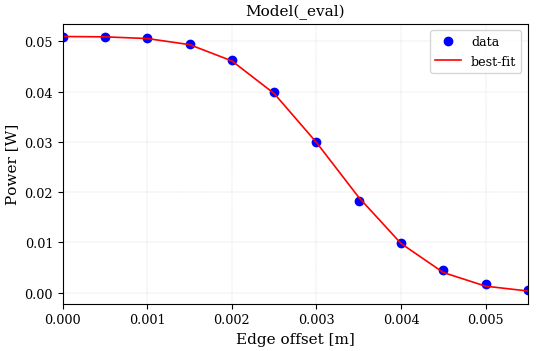

In [6]:
d2 = (37.5-8) * 1e-2
B = 0.13 * 1e-3
P = 51.1 * 1e-3 - B

y0 = 1e-3 * np.array([51.0, 51.0, 50.7, 49.5, 46.5, 40.0, 30.0, 18.4, 10.0, 4.7, 1.9, 0.7])
x  = 50*np.arange(len(y0)) *0.01e-3
w2  = fit(x, y0 - B, P=P, x0=2.5e-3, w=5e-3)

[[Model]]
    Model(_eval)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 12
    # variables        = 2
    chi-square         = 3.5043e-06
    reduced chi-square = 3.5043e-07
    Akaike info crit   = -176.557182
    Bayesian info crit = -175.587369
[[Variables]]
    P:   0.05057 (fixed)
    x0:  0.00265064 +/- 1.6063e-05 (0.61%) (init = 0.0025)
    w:   0.00212462 +/- 4.5455e-05 (2.14%) (init = 0.005)



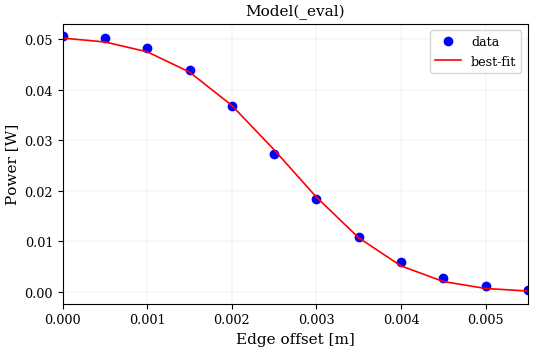

In [7]:
d3 = (54.5-8) * 1e-2
B = 0.13 * 1e-3
P = 50.7 * 1e-3 - B

y0 = 1e-3 * np.array([50.7, 50.4, 48.5, 44.0, 37.0, 27.5, 18.5, 11.0, 6.0, 2.8, 1.3, 0.6])
x  = 50*np.arange(len(y0)) *0.01e-3
w3  = fit(x, y0 - B, P=P, x0=2.5e-3, w=5e-3)

[[Model]]
    Model(_eval)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 28
    # data points      = 10
    # variables        = 2
    chi-square         = 5.0245e-07
    reduced chi-square = 6.2807e-08
    Akaike info crit   = -164.063474
    Bayesian info crit = -163.458304
[[Variables]]
    P:   0.05735 (fixed)
    x0:  0.00249011 +/- 4.9180e-06 (0.20%) (init = 0.0025)
    w:   0.00142921 +/- 1.3911e-05 (0.97%) (init = 0.005)



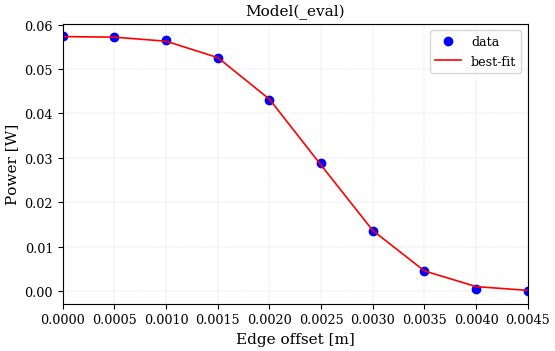

In [8]:
d4 = (10.5-8) * 1e-2
B = 0.05 * 1e-3
P = 57.4 * 1e-3 - B

y0 = 1e-3 * np.array([57.4, 57.2, 56.5, 52.5, 43.0, 28.8, 13.6, 4.5, 0.6, 0.05])


x  = 50*np.arange(len(y0)) *0.01e-3
w4  = fit(x, y0 - B, P=P, x0=2.5e-3, w=5e-3)

[[Model]]
    Model(_eval)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 22
    # data points      = 7
    # variables        = 2
    chi-square         = 6.2826e-07
    reduced chi-square = 1.2565e-07
    Akaike info crit   = -109.583574
    Bayesian info crit = -109.691753
[[Variables]]
    P:   0.07945 (fixed)
    x0:  0.00168792 +/- 4.8929e-06 (0.29%) (init = 0.0025)
    w:   0.00135660 +/- 1.3872e-05 (1.02%) (init = 0.005)



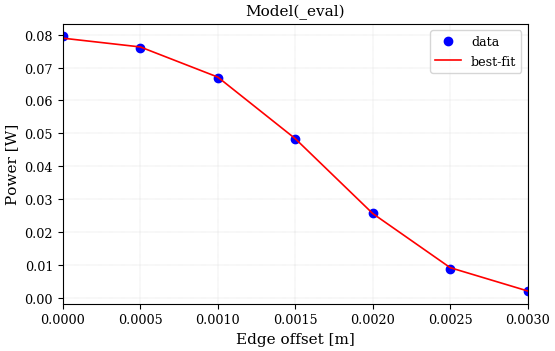

In [9]:
d5 = (-10-8) * 1e-2
B = 0.05 * 1e-3
P = 79.5 * 1e-3 - B

y0 = 1e-3 * np.array([79.5, 76.1, 67, 48.5, 26, 8.8, 2.2])


x  = 50*np.arange(len(y0)) *0.01e-3
w5  = fit(x, y0 - B, P=P, x0=2.5e-3, w=5e-3)

[[Model]]
    Model(_eval)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 21
    # variables        = 2
    chi-square         = 8.9558e-06
    reduced chi-square = 4.7136e-07
    Akaike info crit   = -304.022464
    Bayesian info crit = -301.933419
[[Variables]]
    P:   0.141 (fixed)
    x0:  0.00520627 +/- 8.8530e-06 (0.17%) (init = 0.0025)
    w:   0.00372986 +/- 2.5056e-05 (0.67%) (init = 0.005)



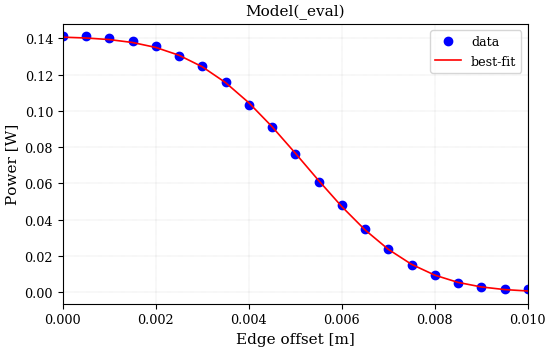

In [11]:
d6 = 1.2827 + 0.36-0.022 # After lens
B = 5 * 1e-3
P = 146.0 * 1e-3 - B

y0 = 1e-3 * np.array([146, 146, 145.0, 143.5, 141, 135, 130, 121, 108.5, 96.0, 81.5, 66.0, 53.0, 40.0, 29.0, 20, 14.5, 10.0, 8.0, 7.0, 7.0,])


x  = 50*np.arange(len(y0)) *0.01e-3
w6  = fit(x, y0 - B, P=P, x0=2.5e-3, w=5e-3)

[[Model]]
    Model(_eval)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 20
    # variables        = 2
    chi-square         = 1.3819e-05
    reduced chi-square = 7.6774e-07
    Akaike info crit   = -279.703431
    Bayesian info crit = -277.711967
[[Variables]]
    P:   0.1185 (fixed)
    x0:  0.00482482 +/- 1.2346e-05 (0.26%) (init = 0.0025)
    w:   0.00314554 +/- 3.4921e-05 (1.11%) (init = 0.005)



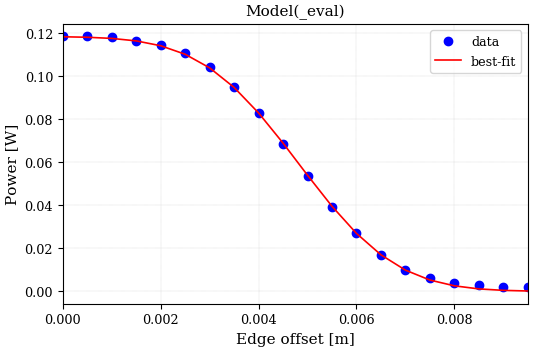

In [12]:
d7 = (10.5+22) * 25.4e-3 # after BS
B = 5 * 1e-3
P = 123.5 * 1e-3 - B

y0 = 1e-3 * np.array([123.5, 123.5, 123.1, 121.5, 119.5, 116.0, 109.5, 100.0, 88.0, 73.5, 58.5, 44.0, 32.0, 22.0, 15.0, 11.0, 9.0, 8, 7, 7])


x  = 50*np.arange(len(y0)) *0.01e-3
w7  = fit(x, y0 - B, P=P, x0=2.5e-3, w=5e-3)

[[Model]]
    Model(_eval)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 21
    # variables        = 2
    chi-square         = 6.5814e-06
    reduced chi-square = 3.4639e-07
    Akaike info crit   = -310.491524
    Bayesian info crit = -308.402479
[[Variables]]
    P:   0.0896 (fixed)
    x0:  0.00508555 +/- 1.1680e-05 (0.23%) (init = 0.0025)
    w:   0.00356767 +/- 3.3045e-05 (0.93%) (init = 0.005)



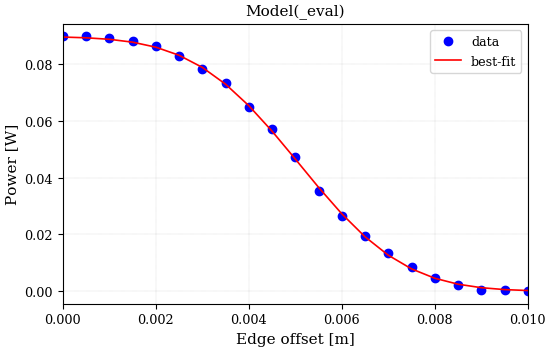

In [13]:
d8 = (55.5+33+22.5)*1e-2 #after BS
B = 5.9 * 1e-3
P = 95.5 * 1e-3 - B

y0 = 1e-3 * np.array([95.5, 95.5, 95.1, 93.9, 92.0, 88.5, 84.1, 79.0, 70.8, 63.0, 53.2, 41.3, 32.3, 25.3, 19.3, 14.5, 10.6, 8.0, 6.5, 6.2, 6.0])


x  = 50*np.arange(len(y0)) *0.01e-3
w8  = fit(x, y0 - B, P=P, x0=2.5e-3, w=5e-3)

[[Model]]
    Model(_eval)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 24
    # data points      = 15
    # variables        = 2
    chi-square         = 2.9865e-06
    reduced chi-square = 2.2973e-07
    Akaike info crit   = -227.441648
    Bayesian info crit = -226.025548
[[Variables]]
    P:   0.09 (fixed)
    x0:  0.00429189 +/- 7.0434e-06 (0.16%) (init = 0.0025)
    w:   0.00197369 +/- 1.9923e-05 (1.01%) (init = 0.005)



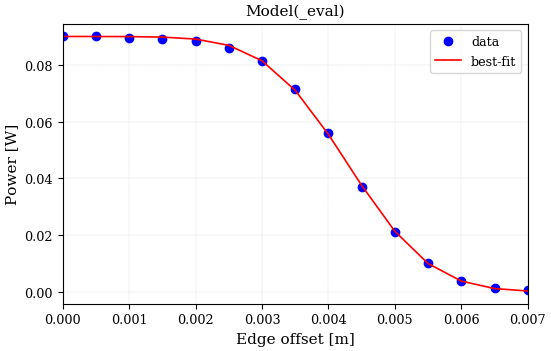

In [15]:
d9 = 1.2827 + 1.651 + 25*25.4e-3
B = 5 * 1e-3
P = 95 * 1e-3 - B

y0 = 1e-3 * np.array([95, 95, 94.5, 94.2, 93.5, 91.0, 86.3, 76.5, 61.0, 42, 25.9, 15.2, 8.9, 6.2, 5.8])


x  = 50*np.arange(len(y0)) *0.01e-3
w9  = fit(x, y0 - B, P=P, x0=2.5e-3, w=5e-3)

## Fit beam before lens for propagation modelling

In [16]:
def fit_beam(x, y, **kwargs):
    model = lmfit.models.ExpressionModel("w0 * sqrt(1 + ( (x-z0)/(pi * w0**2 / lambd) )**2 )")
    params = model.make_params(**kwargs)
    params['lambd'].set(vary=False)

    fit = model.fit(y, params, x=x)
    print(fit.fit_report())

    fit.plot_fit()
    plt.xlabel("Distance from 80:20 BS [m]")
    plt.ylabel("Radius [m]")
    
    return pykat.BeamParam(z=-fit.params['z0'], w0=fit.params['w0'], wavelength=params['lambd'])

[[Model]]
    Model(_eval)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 15
    # data points      = 7
    # variables        = 2
    chi-square         = 4.0765e-08
    reduced chi-square = 8.1530e-09
    Akaike info crit   = -128.729468
    Bayesian info crit = -128.837647
[[Variables]]
    w0:     0.00131428 +/- 3.8364e-05 (2.92%) (init = 0.001)
    z0:    -0.21684768 +/- 0.02340035 (10.79%) (init = 0)
    lambd:  1.06e-05 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(w0, z0) = -0.561



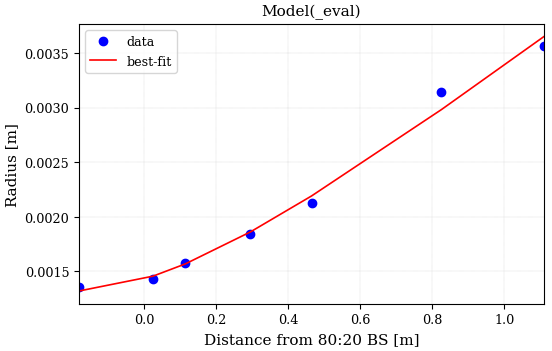

In [17]:
qin = fit_beam([d5,d4,d1,d2,d3,d7,d8], np.array([w5,w4,w1,w2,w3,w7,w8]), lambd=10.6e-6, w0=1e-3, z0=0, M=1)

## Modelling propagation

All matches up as we'd expect.

BS to lens [m]: 1.2827
Lens to periscope [m]: 1.651
Periscope to viewport [m]: 0.35
Viewport to SRM[m]: 1.9


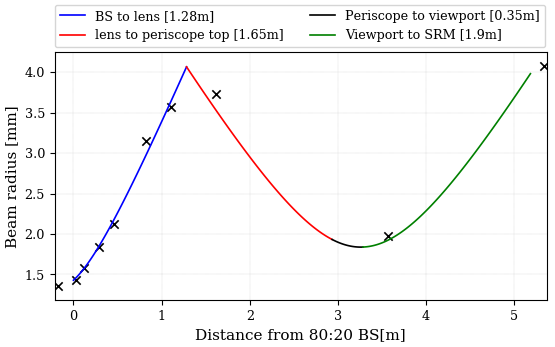

In [19]:
dz = 0
z_bs2lens   = (22 + 13 + 13 + 2.5) * 25.4e-3 +dz
z_lens2peri = (21 + 7 + 37) * 25.4e-3 - dz
z_peri2viewport  = 0.35
z_viewport2SRM  = 1.9

print("BS to lens [m]:", z_bs2lens)
print("Lens to periscope [m]:", z_lens2peri)
print("Periscope to viewport [m]:", z_peri2viewport)
print("Viewport to SRM[m]:", z_viewport2SRM)

z1 = np.linspace(0,                                         z_bs2lens,               100)
z2 = np.linspace(z_bs2lens,                                 z_bs2lens + z_lens2peri, 100)
z3 = np.linspace(z_bs2lens + z_lens2peri,                   z_bs2lens + z_lens2peri + z_peri2viewport,  100)
z4 = np.linspace(z_bs2lens + z_lens2peri + z_peri2viewport, z_bs2lens + z_lens2peri + z_peri2viewport +  z_viewport2SRM,  100)

q2a  = apply(space(1, z_bs2lens), qin, 1, 1)
q2   = apply(lens(1), q2a, 1, 1)
q3   = apply(space(1, z_lens2peri), q2, 1, 1)
q4   = apply(space(1, z_peri2viewport), q3, 1, 1)
qSRM = apply(space(1, z_viewport2SRM), q4, 1, 1)

plt.plot(z1, qin.beamsize(z1)/1e-3,      label='BS to lens [%.3gm]' % z_bs2lens)
plt.plot(z2, q2.beamsize(z2-z2[0])/1e-3, label='lens to periscope top [%.3gm]' % z_lens2peri)
plt.plot(z3, q3.beamsize(z3-z3[0])/1e-3, label='Periscope to viewport [%.3gm]' % z_peri2viewport)
plt.plot(z4, q4.beamsize(z4-z4[0])/1e-3, label='Viewport to SRM [%.3gm]' % z_viewport2SRM)

plt.scatter([d1,d2,d3,d4,d5,d6,d7,d8,d9,d10], np.array([w1,w2,w3,w4,w5,w6,w7,w8,w9,w10])/1e-3, c='k', marker='x')
plt.xlabel("Distance from 80:20 BS[m]")
plt.ylabel("Beam radius [mm]")
plt.legend(loc=(0,1.02), ncol=2)
plt.tight_layout()

## Conclusion

The target is 5mm radius at the SRM. 

### Need to get the periscope about 1m away from the viewport

BS to lens [m]: 1.2827
Lens to periscope [m]: 1.651
Periscope to viewport [m]: 1
Viewport to SRM[m]: 1.9


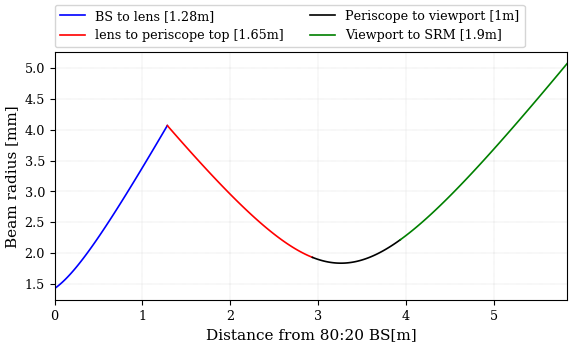

In [21]:
dz = 0
z_bs2lens   = (22 + 13 + 13 + 2.5) * 25.4e-3 +dz
z_lens2peri = (21 + 7 + 37) * 25.4e-3 - dz
z_peri2viewport  = 1
z_viewport2SRM  = 1.9

print("BS to lens [m]:", z_bs2lens)
print("Lens to periscope [m]:", z_lens2peri)
print("Periscope to viewport [m]:", z_peri2viewport)
print("Viewport to SRM[m]:", z_viewport2SRM)

z1 = np.linspace(0,                                         z_bs2lens,               100)
z2 = np.linspace(z_bs2lens,                                 z_bs2lens + z_lens2peri, 100)
z3 = np.linspace(z_bs2lens + z_lens2peri,                   z_bs2lens + z_lens2peri + z_peri2viewport,  100)
z4 = np.linspace(z_bs2lens + z_lens2peri + z_peri2viewport, z_bs2lens + z_lens2peri + z_peri2viewport +  z_viewport2SRM,  100)

q2a  = apply(space(1, z_bs2lens), qin, 1, 1)
q2   = apply(lens(1), q2a, 1, 1)
q3   = apply(space(1, z_lens2peri), q2, 1, 1)
q4   = apply(space(1, z_peri2viewport), q3, 1, 1)
qSRM = apply(space(1, z_viewport2SRM), q4, 1, 1)

plt.plot(z1, qin.beamsize(z1)/1e-3,      label='BS to lens [%.3gm]' % z_bs2lens)
plt.plot(z2, q2.beamsize(z2-z2[0])/1e-3, label='lens to periscope top [%.3gm]' % z_lens2peri)
plt.plot(z3, q3.beamsize(z3-z3[0])/1e-3, label='Periscope to viewport [%.3gm]' % z_peri2viewport)
plt.plot(z4, q4.beamsize(z4-z4[0])/1e-3, label='Viewport to SRM [%.3gm]' % z_viewport2SRM)

plt.xlabel("Distance from 80:20 BS[m]")
plt.ylabel("Beam radius [mm]")
plt.legend(loc=(0,1.02), ncol=2)
plt.tight_layout()